---
---
*<h1 align='center'> Causal Sentence Detection </h1>*
*<h2 align='center'> Transfer-Learning Models: Bert+(ML/Bi-GRU-Att/NN) </h2>*

---
---
`Bert encoding + (Machine Learning models / Bidirectional GRU with Attention / Neural Network)` <br>
Name: Logesh.V <br>
Email: vlogesh2001@gmail.com <br>
DATASETS: 
- Causaly_small: https://archive.org/details/CausalySmall <br>
About Dataset: The dataset contains 2000 manually annotated sentences derived from
pubmed articles. 1113 out of 2000 sentences are annotated as Causal (Annotated_Causal = 1) and the rest (887) are annotated as non-Causal (Annotated_Causal = 0).

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
#tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

import warnings
warnings.filterwarnings('ignore')

## Read File

In [2]:
import pandas as pd
data = pd.read_csv("Causaly_small.csv")

#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)

In [3]:
#Print the dataframe
data

,Sentence,Annotated_Causal
0,"Results indicated that boys with ADHD , relative to typically developing boys , exhibited greater motor activity across tasks , and both groups activity was greater during EF tasks relative to control tasks .",1
1,Ticagrelor appears to provide higher value for patients in several recognized high-risk subgroups .,0
2,"Whatever the mechanism , active smoking is an important modifiable factor that seems to be associated with a poor response to MTX .",1
3,"In this study , we examined whether use of an acellular scaffold treated with the small molecule Smoothened agonist could aid in critical-size mouse calvarial defect repair .",0
4,"Using causal inference testing , we searched causal variants across eight cardiometabolic traits and identified several cis-eGenes that were causal mediators for the corresponding traits , as well as examples of trans-mediators .",0
...,...,...
1995,The obstacle of getting older men to undergo circumcision may also be associated with working schedules that may disclose one 's circumcision status .,1
1996,"It could also clearly detect differences in SD rates of three monotherapy groups : patients treated with risperidone had the highest scores , followed by patients treated with olanzapine , whereas patients treated with aripiprazole had the lowest scores .",0
1997,These results in part explain the impairment of host-defense mechanisms seen in the perioperative period .,0
1998,"Modern research makes frequent use of animal models , that is , organisms raised and bred experimentally in order to help the understanding of biological and chemical processes affecting organisms or whole environments .",0


## Exploratory Data Analysis

In [4]:
#Missing values

print("The percentage of Missing Values in each column is given by:")
data.isna().sum()/len(data)*100

The percentage of Missing Values in each column is given by:


Sentence            0.0
Annotated_Causal    0.0
dtype: float64

In [5]:
#Unique values

print(f'Number of unique values in keyword = {data["Sentence"].nunique()}' )
print(f'Number of unique values in location = {data["Annotated_Causal"].nunique()}')

Number of unique values in keyword = 2000
Number of unique values in location = 2


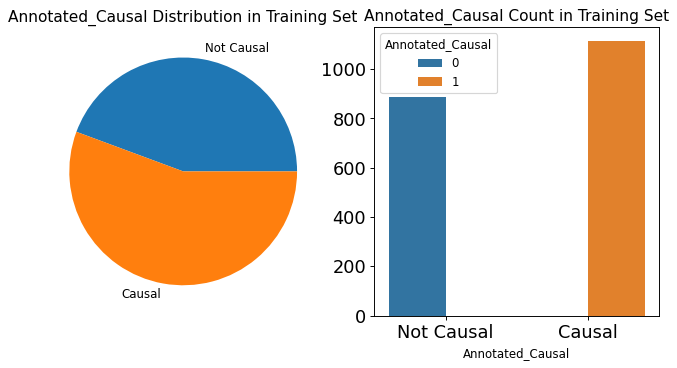

In [6]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(8, 4), dpi=85)
plt.tight_layout()

data.groupby('Annotated_Causal').count()['Sentence'].plot(kind='pie', ax=axes[0], labels=['Not Causal', 'Causal'])
sns.countplot(x=data['Annotated_Causal'], hue=data['Annotated_Causal'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Causal', 'Causal'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Annotated_Causal Distribution in Training Set', fontsize=13)
axes[1].set_title('Annotated_Causal Count in Training Set', fontsize=13)

plt.show()

## Bert Models

In [26]:
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

print('Available Pretrained Models:',*list(map_name_to_handle.keys()), sep = "\n")

Available Pretrained Models:
bert_en_uncased_L-12_H-768_A-12
bert_en_cased_L-12_H-768_A-12
bert_multi_cased_L-12_H-768_A-12
small_bert/bert_en_uncased_L-2_H-128_A-2
small_bert/bert_en_uncased_L-2_H-256_A-4
small_bert/bert_en_uncased_L-2_H-512_A-8
small_bert/bert_en_uncased_L-2_H-768_A-12
small_bert/bert_en_uncased_L-4_H-128_A-2
small_bert/bert_en_uncased_L-4_H-256_A-4
small_bert/bert_en_uncased_L-4_H-512_A-8
small_bert/bert_en_uncased_L-4_H-768_A-12
small_bert/bert_en_uncased_L-6_H-128_A-2
small_bert/bert_en_uncased_L-6_H-256_A-4
small_bert/bert_en_uncased_L-6_H-512_A-8
small_bert/bert_en_uncased_L-6_H-768_A-12
small_bert/bert_en_uncased_L-8_H-128_A-2
small_bert/bert_en_uncased_L-8_H-256_A-4
small_bert/bert_en_uncased_L-8_H-512_A-8
small_bert/bert_en_uncased_L-8_H-768_A-12
small_bert/bert_en_uncased_L-10_H-128_A-2
small_bert/bert_en_uncased_L-10_H-256_A-4
small_bert/bert_en_uncased_L-10_H-512_A-8
small_bert/bert_en_uncased_L-10_H-768_A-12
small_bert/bert_en_uncased_L-12_H-128_A-2
small

In [27]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

# Choose the Model
bert_model_name = 'small_bert/bert_en_uncased_L-12_H-768_A-12' 

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

#tf.compat.v1.disable_eager_execution()
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess, name='preprocess', trainable=False)
bert_encoder = hub.KerasLayer(tfhub_handle_encoder, name='encoder', trainable=False)

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## Feature Extraction

In [9]:
from tqdm import tqdm
features = []
for i in tqdm(data['Sentence']):
    bert_results = bert_encoder(bert_preprocess([i]))
    features.append(bert_results["pooled_output"].numpy())
features = np.array(features)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [08:22<00:00,  3.98it/s]


In [14]:
#Saving features
features = features.reshape(len(data),768)
np.save('bert-features',features)
features.shape

(2000, 768)

---

# **Transfer Learning Approches**
restart the kernel for faster run-time as features are extracted from bert transformer and saved

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# loading bert-features
x = np.load('bert-features.npy')

import pandas as pd
data = pd.read_csv("Causaly_small.csv")
y = data['Annotated_Causal'].to_numpy()

## Train/Test/Validation Data-Split

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# split train dataset into train, validation and test sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y,
                                                                            random_state=2022, 
                                                                            test_size=0.2, 
                                                                            stratify=y)

class_names = ['Not Causal','Causal']

---
## 1--> ML models with Hyper-parameter tuning

---
### *Searching for the best model*
These above features-data is given as inputs for ML-Classifiers and best out them is found

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

names = ["Linear SVM", "Poly SVM", "RBF SVM", "Sig SVM", "lbfgs Log-Reg", 
         "saga Log-Reg", "SGD", "Naive Bayes","KMeans", "Gaussian Process", 
         "Decision Tree", "Random Forest", "KNN", "Neural Net", "AdaBoost", 
         "GradientBoost", "QDA", "LGBM", "XGB", "CatBoost"]

classifiers = [SVC(kernel='linear',max_iter=10000), SVC(kernel='poly',max_iter=10000), 
               SVC(kernel='rbf',max_iter=10000), SVC(kernel='sigmoid',max_iter=10000),
               LogisticRegression(solver='lbfgs'), LogisticRegression(solver='saga'), SGDClassifier(), 
               GaussianNB(), KMeans(n_clusters=len(class_names)), GaussianProcessClassifier(), 
               DecisionTreeClassifier(max_depth=25), RandomForestClassifier(max_depth=25), KNeighborsClassifier(), 
               MLPClassifier(max_iter=2500,early_stopping=True), AdaBoostClassifier(), 
               GradientBoostingClassifier(max_depth=15), QuadraticDiscriminantAnalysis(),
               LGBMClassifier(), XGBClassifier(), CatBoostClassifier(iterations=150,learning_rate=0.1,silent=True)]

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

def runML():
    for i in range(len(class_names)):
        print("CLASS -",i,"-->",class_names[i])

    fig = plt.figure(figsize=(18,14))
    fig.tight_layout()
    nof_clsfrs = len(names)
    Metrics = {}
    
    print('\nClassification Report for each Classifier:')
    for i in range(nof_clsfrs):
        metric = []
        classifier = classifiers[i]
        plt.subplot(nof_clsfrs/5,5,i+1)
        plt.xticks([])
        plt.yticks([])
    
        print(f'\n\nClassifier: {str(classifier)[0:25]}...')
        if 'KMeans' in str(classifier):
            # for KMeans, we use the entire features data as it unsupervised
            start_time = time.time(); classifier.fit(x, y); metric.append(time.time() - start_time);
            metric.append(metric[-1]) # test run time is same
        else:
            start_time = time.time(); classifier.fit(train_features, train_labels); metric.append(time.time() - start_time); 
            start_time = time.time(); test_pred = classifier.predict(test_features); metric.append(time.time() - start_time);
        acc = accuracy_score(test_labels,test_pred) *100; metric.append(acc);
        Metrics[names[i]] = metric
        #print(f'Accuracy  is {acc}%, Report:')
        print(classification_report(test_labels, test_pred))
    
        plt.gca().set_title(names[i])
        CM = confusion_matrix(test_labels, test_pred)
        plt.imshow(CM,interpolation='nearest',cmap='summer')
        for (i, j), z in np.ndenumerate(CM):
            plt.text(j, i, z, ha='center', va='center')
        plt.xticks(np.arange(len(class_names)),class_names, fontsize=8)
        plt.yticks(np.arange(len(class_names)))
        plt.grid(False)
    plt.show()
    return Metrics

#### *Fitting and Ploting results*

CLASS - 0 --> Not Causal
CLASS - 1 --> Causal

Classification Report for each Classifier:


Classifier: SVC(kernel='linear', max_...
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       177
           1       0.77      0.79      0.78       223

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



Classifier: SVC(kernel='poly', max_it...
              precision    recall  f1-score   support

           0       0.73      0.63      0.68       177
           1       0.74      0.82      0.77       223

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.73       400
weighted avg       0.73      0.73      0.73       400



Classifier: SVC(max_iter=10000)...
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       177
           1       0.73 

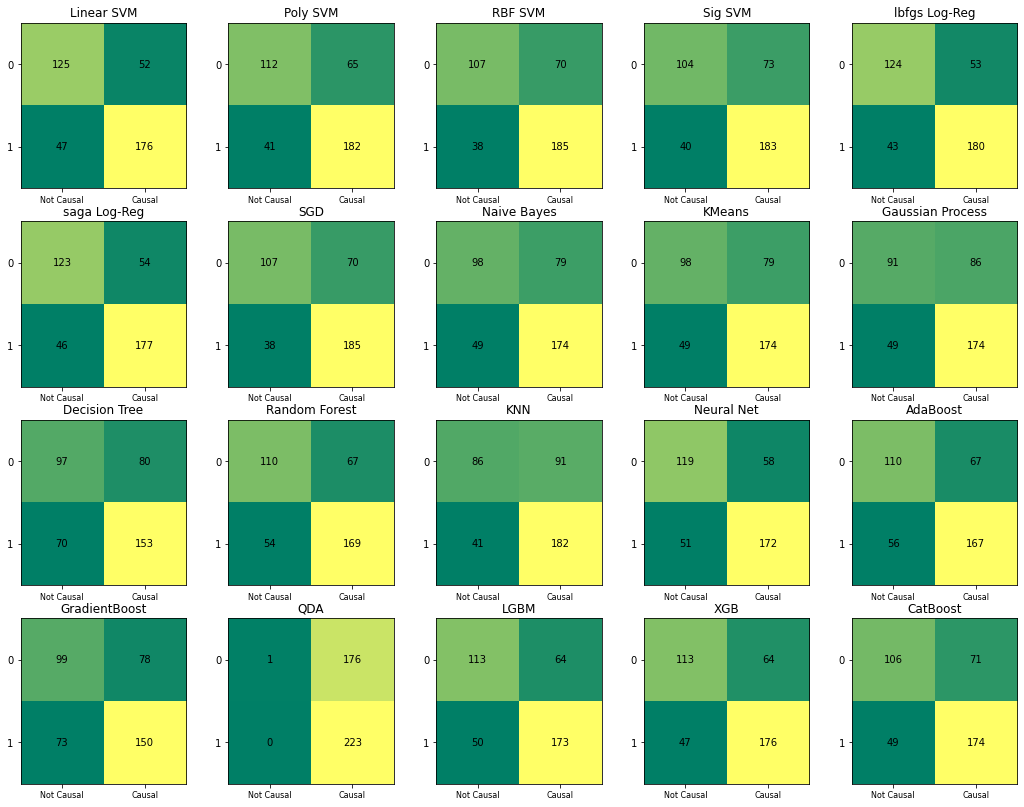

In [5]:
Metrics = runML()

In [6]:
result = pd.DataFrame(Metrics.values(), columns =['Training-time', 'Prediction-time', 'Accuracy'])
result.index = Metrics.keys()

print("\nClassifier for which max Accuracy is obtained:")
print(result.loc[result["Accuracy"].idxmax()])

print("\n\nClassifier for which min Training-time is obtained:")
print(result.loc[result["Training-time"].idxmin()])

print("\n\nClassifier for which min Prediction-time is obtained:")
print(result.loc[result["Prediction-time"].idxmin()])

print("\n\nResults of all the Classifiers:")
result.sort_values(by="Accuracy", ascending=False)


Classifier for which max Accuracy is obtained:
Training-time       0.156253
Prediction-time     0.015624
Accuracy           76.000000
Name: lbfgs Log-Reg, dtype: float64


Classifier for which min Training-time is obtained:
Training-time       0.000000
Prediction-time     0.046838
Accuracy           67.000000
Name: KNN, dtype: float64


Classifier for which min Prediction-time is obtained:
Training-time       1.359558
Prediction-time     0.000000
Accuracy           75.000000
Name: saga Log-Reg, dtype: float64


Results of all the Classifiers:


,Training-time,Prediction-time,Accuracy
lbfgs Log-Reg,0.156253,0.015624,76.00
Linear SVM,0.542196,0.046867,75.25
saga Log-Reg,1.359558,0.000000,75.00
Poly SVM,0.440361,0.062493,73.50
RBF SVM,0.485666,0.180347,73.00
SGD,0.184507,0.000000,73.00
Neural Net,0.392619,0.000000,72.75
XGB,7.578043,0.000000,72.25
Sig SVM,0.534740,0.093745,71.75
LGBM,2.666073,0.000000,71.50


---
## 2--> Bert + Bidirectional-GRU + Attention

---

In [3]:
from tensorflow import keras
import tensorflow as tf
from keras import layers, Model
from keras import backend as K, Sequential
from keras.layers import Layer, Embedding, Bidirectional, Attention, GRU, Dense, SpatialDropout1D, LSTM

# defining Attention layer
class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [14]:
model = Sequential([
    layers.Input(shape=(768), name='features-inp'),
    layers.Reshape((1, 768), name='vectorize'),
    SpatialDropout1D(0.4, name='spatial-drop'),
    Bidirectional(GRU(1024, dropout=0.05, recurrent_dropout=0.2, return_sequences=True, name='GRU'), name = 'Bidir-GRU'),
    Attention(return_sequences=False),
    Dense(1, activation='sigmoid', name='output')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model._name = 'Bert-BiGRU-Att'
model.summary()

Model: "Bert-BiGRU-Att"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vectorize (Reshape)         (None, 1, 768)            0         
                                                                 
 spatial-drop (SpatialDropou  (None, 1, 768)           0         
 t1D)                                                            
                                                                 
 Bidir-GRU (Bidirectional)   (None, 1, 2048)           11022336  
                                                                 
 attention_2 (Attention)     (None, 2048)              2049      
                                                                 
 output (Dense)              (None, 1)                 2049      
                                                                 
Total params: 11,026,434
Trainable params: 11,026,434
Non-trainable params: 0
________________________________________

In [13]:
#Stop training when a monitored metric (here, accuracy) has stopped improving.
#patience: Number of epochs with no improvement after which training will be stopped.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5)

# Saving the best Trained model
model_file = model.name+'_Model.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(model_file, save_best_only=True)

tf.keras.backend.clear_session
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.15,
                    shuffle=True,
                    callbacks=[early_stopping_cb, checkpoint_cb]
                   )

Epoch 1/20
11/11 [==============================] - 5s 166ms/step - loss: 0.8584 - accuracy: 0.5853 - val_loss: 0.6890 - val_accuracy: 0.6167
Epoch 2/20
11/11 [==============================] - 1s 96ms/step - loss: 0.6277 - accuracy: 0.6625 - val_loss: 0.5983 - val_accuracy: 0.6625
Epoch 3/20
11/11 [==============================] - 1s 94ms/step - loss: 0.5563 - accuracy: 0.7081 - val_loss: 0.5302 - val_accuracy: 0.7500
Epoch 4/20
11/11 [==============================] - 1s 95ms/step - loss: 0.5203 - accuracy: 0.7463 - val_loss: 0.5219 - val_accuracy: 0.7583
Epoch 5/20
11/11 [==============================] - 1s 94ms/step - loss: 0.5028 - accuracy: 0.7515 - val_loss: 0.4941 - val_accuracy: 0.7542
Epoch 6/20
11/11 [==============================] - 1s 85ms/step - loss: 0.5013 - accuracy: 0.7559 - val_loss: 0.5131 - val_accuracy: 0.7292
Epoch 7/20
11/11 [==============================] - 1s 80ms/step - loss: 0.4958 - accuracy: 0.7588 - val_loss: 0.5082 - val_accuracy: 0.7708
Epoch 8/20
1

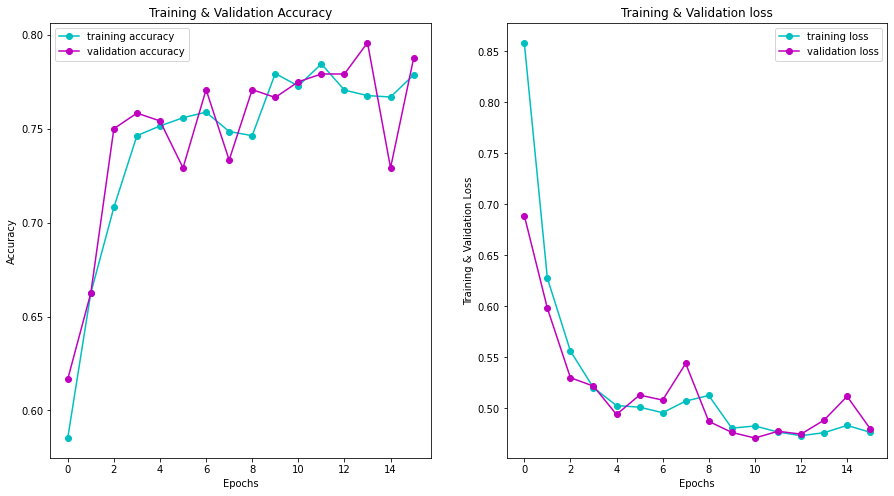

In [15]:
def plot_accuracy_and_loss_of_train_and_validation_dataset(history):
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']
    val_acc=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    epoch=[i for i in range(len(train_acc))]
    fig , ax=plt.subplots(1,2)
    fig.set_size_inches(15,8)
    ax[0].plot(epoch,train_acc,'co-',label='training accuracy')
    ax[0].plot(epoch,val_acc,'mo-',label='validation accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[1].plot(epoch,train_loss,'c-o',label='training loss')
    ax[1].plot(epoch,val_loss,'m-o',label='validation loss')
    ax[1].set_title('Training & Validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")

# incase of early stop
plot_accuracy_and_loss_of_train_and_validation_dataset(history)

## Evaluation

In [17]:
#model = keras.models.load_model(model_file) # rollback to best model
loss,accuracy = model.evaluate(train_features,train_labels)
print("The accuracy of train text is : ",accuracy)

50/50 [==============================] - 1s 14ms/step - loss: 0.6857 - accuracy: 0.5681
The accuracy of train text is :  0.5681250095367432


### Accuracy for each class

In [22]:
print("Predicting Test data using the above Trained model...")
pred_Ids_of_test = model.predict(test_features)

Predicting Test data using the above Trained model...


In [23]:
class_names = ['Not Causal','Causal']

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predIdxs = np.argmax(pred_Ids_of_test, axis=1) # to get the indices of max value in each row
print(classification_report(test_labels, predIdxs,target_names=class_names))

              precision    recall  f1-score   support

  Not Causal       0.44      1.00      0.61       177
      Causal       0.00      0.00      0.00       223

    accuracy                           0.44       400
   macro avg       0.22      0.50      0.31       400
weighted avg       0.20      0.44      0.27       400



### Confusion Matrix

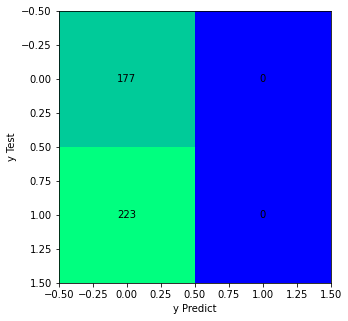

In [25]:
CM = confusion_matrix(test_labels, predIdxs)
# Plot confusion matrix
plt.figure(figsize = (5,5))
plt.imshow(CM,interpolation='nearest',cmap='winter')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y Test")
plt.grid(False)
plt.show()

---
## 3--> Bert + Dense layers only approach

---

In [28]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout1")(outputs['pooled_output'])
l = tf.keras.layers.Dense(2048, activation='relu', name="fc1")(l)
l = tf.keras.layers.Dense(2048, activation='relu', name="fc2")(l)
l = tf.keras.layers.Dropout(0.1, name="dropout2")(l)
l = tf.keras.layers.Dense(1024, activation='relu', name="fc3")(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model._name = bert_model_name
model.summary()
#keras.utils.plot_model(model)

Model: "small_bert/bert_en_uncased_L-12_H-768_A-12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocess (KerasLayer)        {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                 

## Training and Results

In [18]:
#Stop training when a monitored metric (here, accuracy) has stopped improving.
#patience: Number of epochs with no improvement after which training will be stopped.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=4)

# Saving the best Trained model
model_file = model.name+'_Model.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(model_file, save_best_only=True)

tf.keras.backend.clear_session
history = model.fit(train_text, train_labels,
                    epochs=15,
                    batch_size=64,
                    validation_data=(val_text,val_labels),
                    callbacks=[early_stopping_cb, checkpoint_cb]
                   )

Epoch 1/15
22/22 [==============================] - 32s 1s/step - loss: 1.0943 - accuracy: 0.5521 - val_loss: 0.6136 - val_accuracy: 0.6667
Epoch 2/15
22/22 [==============================] - 29s 1s/step - loss: 0.5467 - accuracy: 0.7271 - val_loss: 0.6109 - val_accuracy: 0.6533
Epoch 3/15
22/22 [==============================] - 29s 1s/step - loss: 0.4949 - accuracy: 0.7636 - val_loss: 0.5926 - val_accuracy: 0.7300
Epoch 4/15
22/22 [==============================] - 30s 1s/step - loss: 0.4969 - accuracy: 0.7636 - val_loss: 0.5485 - val_accuracy: 0.7567
Epoch 5/15
22/22 [==============================] - 29s 1s/step - loss: 0.4590 - accuracy: 0.7821 - val_loss: 0.5672 - val_accuracy: 0.7500
Epoch 6/15
22/22 [==============================] - 29s 1s/step - loss: 0.4296 - accuracy: 0.8014 - val_loss: 0.5781 - val_accuracy: 0.7467
Epoch 7/15
22/22 [==============================] - 30s 1s/step - loss: 0.4510 - accuracy: 0.7821 - val_loss: 0.6493 - val_accuracy: 0.6567
Epoch 8/15
22/22 [==

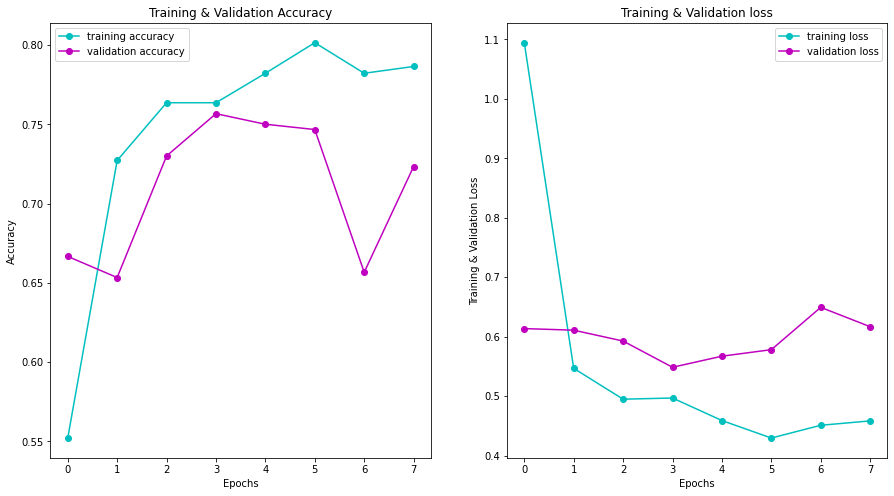

In [19]:
def plot_accuracy_and_loss_of_train_and_validation_dataset(history):
    train_acc=history.history['accuracy']
    train_loss=history.history['loss']
    val_acc=history.history['val_accuracy']
    val_loss=history.history['val_loss']
    epoch=[i for i in range(len(train_acc))]
    fig , ax=plt.subplots(1,2)
    fig.set_size_inches(15,8)
    ax[0].plot(epoch,train_acc,'co-',label='training accuracy')
    ax[0].plot(epoch,val_acc,'mo-',label='validation accuracy')
    ax[0].set_title('Training & Validation Accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[1].plot(epoch,train_loss,'c-o',label='training loss')
    ax[1].plot(epoch,val_loss,'m-o',label='validation loss')
    ax[1].set_title('Training & Validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Training & Validation Loss")

# incase of early stop
plot_accuracy_and_loss_of_train_and_validation_dataset(history)

## Evaluation

In [20]:
# loading the saved model of Inception Classifier
model_file = bert_model_name+'_Model.h5'
#model = keras.models.load_model(model_file) # rollback to best model
loss,accuracy = model.evaluate(train_text,train_labels)
print("The accuracy of train text is : ",accuracy)

44/44 [==============================] - 20s 452ms/step - loss: 0.4316 - accuracy: 0.7971
The accuracy of train text is :  0.7971428632736206


### Accuracy for each class

In [21]:
print("Predicting Test data using the above Trained model...")
pred_Ids_of_test = model.predict(test_text)

Predicting Test data using the above Trained model...


In [22]:
class_names = ['Not Causal','Causal']

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
predIdxs = np.argmax(pred_Ids_of_test, axis=1) # to get the indices of max value in each row
print(classification_report(test_labels, predIdxs,target_names=class_names))

              precision    recall  f1-score   support

  Not Causal       0.44      1.00      0.61       133
      Causal       0.00      0.00      0.00       167

    accuracy                           0.44       300
   macro avg       0.22      0.50      0.31       300
weighted avg       0.20      0.44      0.27       300



### Confusion Matrix

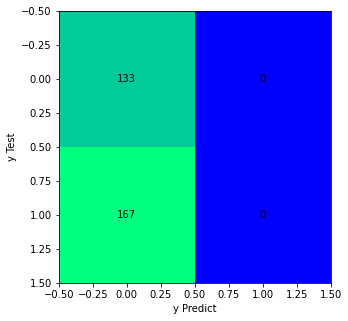

In [24]:
CM = confusion_matrix(test_labels, predIdxs)
# Plot confusion matrix
plt.figure(figsize = (5,5))
plt.imshow(CM,interpolation='nearest',cmap='winter')
for (i, j), z in np.ndenumerate(CM):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("y Predict")
plt.ylabel("y Test")
plt.grid(False)
plt.show()

---
#### *<div style="text-align: center"> - - - - - Thank You - - - - - <div>*
---